In [1]:
include("../AR/utils/utils.jl")
include("../AR/utils/Structure.jl")
include("table_reader.jl")
include("Prev2.jl")
include("PhenoPred.jl")
include("PhenoPlot.jl")
cd(@__DIR__)
commonpath = "../mystations/"

ERROR: LoadError: too many parameters for type AbstractInterpolation
Stacktrace:
 [1] top-level scope
   @ C:\Users\goninarn\.julia\packages\SparseConnectivityTracer\litqn\ext\SparseConnectivityTracerDataInterpolationsExt.jl:28
 [2] include
   @ .\Base.jl:557 [inlined]
 [3] include_package_for_output(pkg::Base.PkgId, input::String, depot_path::Vector{String}, dl_load_path::Vector{String}, load_path::Vector{String}, concrete_deps::Vector{Pair{Base.PkgId, UInt128}}, source::String)
   @ Base .\loading.jl:2881
 [4] top-level scope
   @ stdin:6
in expression starting at C:\Users\goninarn\.julia\packages\SparseConnectivityTracer\litqn\ext\SparseConnectivityTracerDataInterpolationsExt.jl:3
in expression starting at stdin:6
┌ Error: Error during loading of extension SparseConnectivityTracerDataInterpolationsExt of SparseConnectivityTracer, use `Base.retry_load_extensions()` to retry.
│   exception = 1-element ExceptionStack:
Failed to precompile SparseConnectivityTracerDataInterpolationsExt [

"../mystations/"

TN temperatures and dates

In [2]:
TN_temp_Montpellier = initTN(commonpath * "TN_Montpellier.txt")
TN_temp_Bonn = initTN(commonpath * "TN_Bonn.txt")
TN_temp_Nantes = initTN(commonpath * "TN_Nantes.txt")

TN_vecs = [TN_temp_Montpellier.df.TN, TN_temp_Bonn.df.TN, TN_temp_Nantes.df.TN]
dates_vecs_TN = [TN_temp_Montpellier.df.DATE, TN_temp_Bonn.df.DATE, TN_temp_Nantes.df.DATE]

3-element Vector{Vector{Date}}:
 [Date("1946-01-01"), Date("1946-01-02"), Date("1946-01-03"), Date("1946-01-04"), Date("1946-01-05"), Date("1946-01-06"), Date("1946-01-07"), Date("1946-01-08"), Date("1946-01-09"), Date("1946-01-10")  …  Date("2022-12-22"), Date("2022-12-23"), Date("2022-12-24"), Date("2022-12-25"), Date("2022-12-26"), Date("2022-12-27"), Date("2022-12-28"), Date("2022-12-29"), Date("2022-12-30"), Date("2022-12-31")]
 [Date("1976-11-01"), Date("1976-11-02"), Date("1976-11-03"), Date("1976-11-04"), Date("1976-11-05"), Date("1976-11-06"), Date("1976-11-07"), Date("1976-11-08"), Date("1976-11-09"), Date("1976-11-10")  …  Date("2025-02-19"), Date("2025-02-20"), Date("2025-02-21"), Date("2025-02-22"), Date("2025-02-23"), Date("2025-02-24"), Date("2025-02-25"), Date("2025-02-26"), Date("2025-02-27"), Date("2025-02-28")]
 [Date("1992-01-01"), Date("1992-01-02"), Date("1992-01-03"), Date("1992-01-04"), Date("1992-01-05"), Date("1992-01-06"), Date("1992-01-07"), Date("1992-01-08

## Apple phenology model

Endodormancy break date :
$n_{db} = Inf \{ D, \sum_{d = CPO}^D R_c(\theta_d) > C \} $  
Budburst date :
$n_{bb} = Inf \{ D, \sum_{d = n_{db}}^D R_f(\theta_d) > H \} $  
$C$, $H$ : Chilling and heating quantity required  
$\theta_d$ : Temperature (TG) at day d  

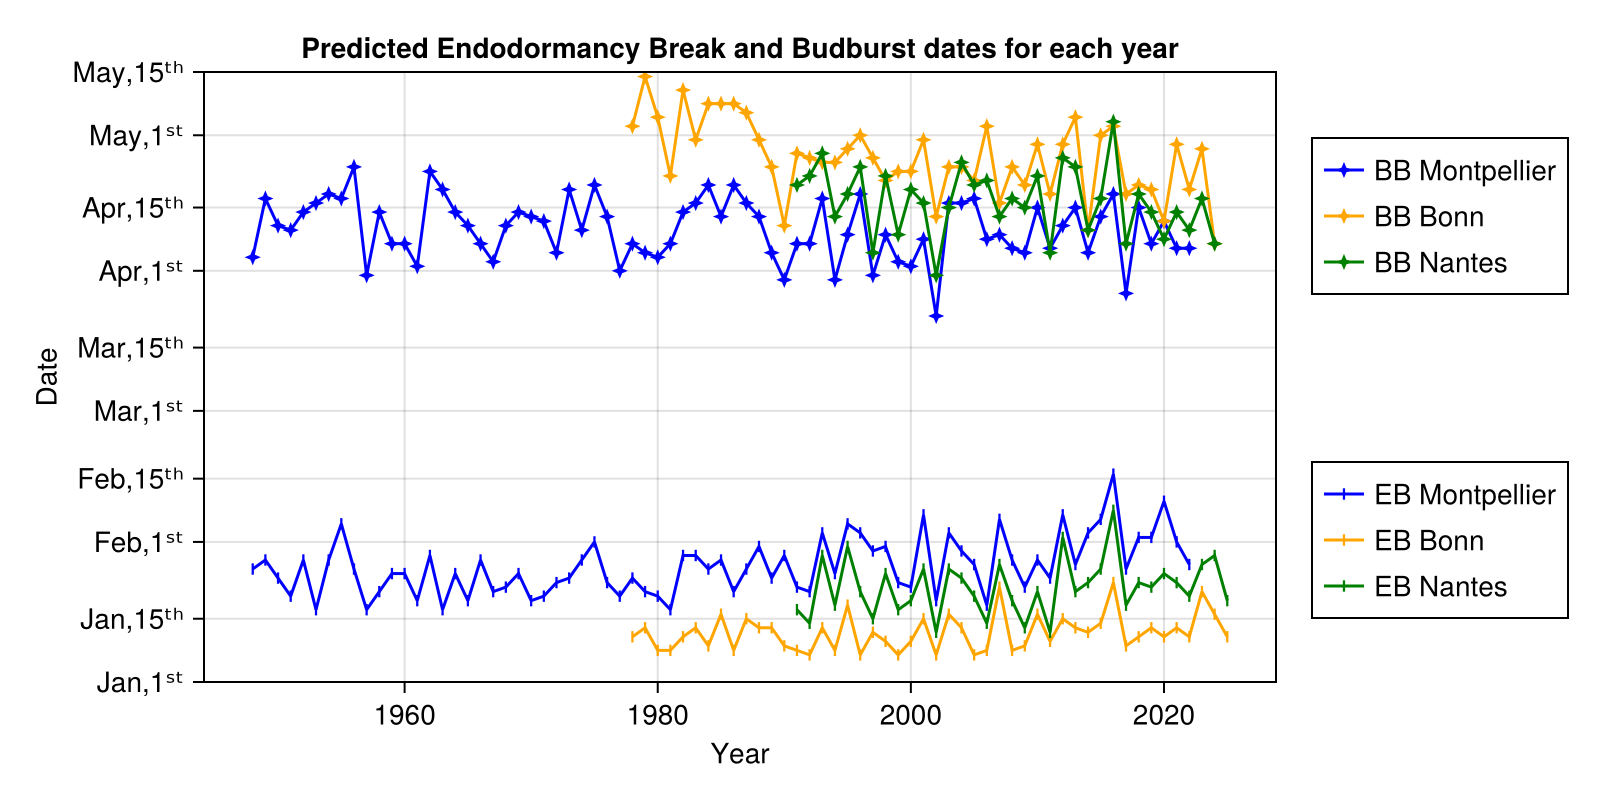

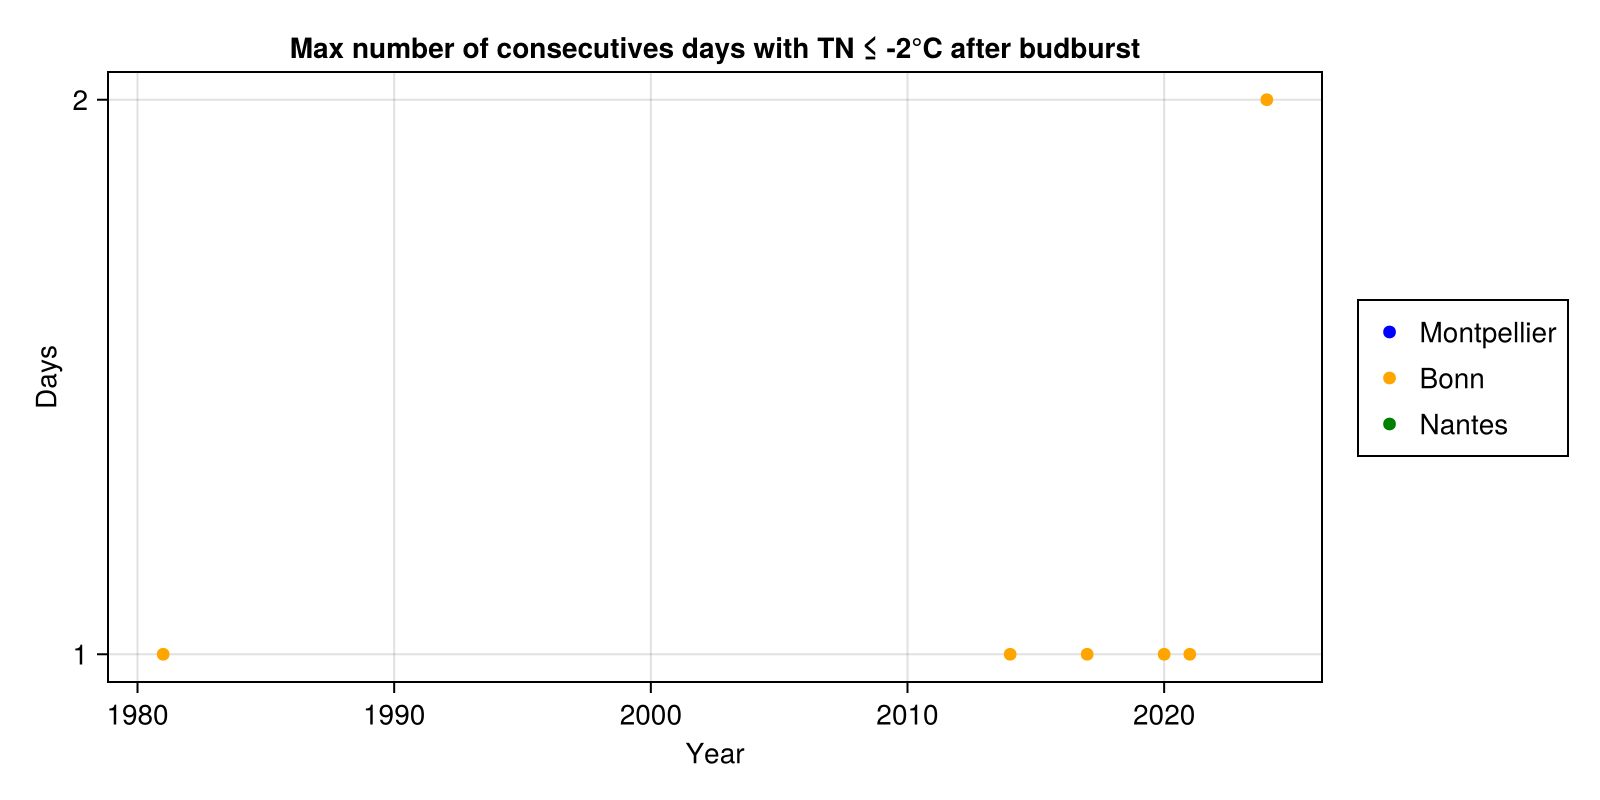

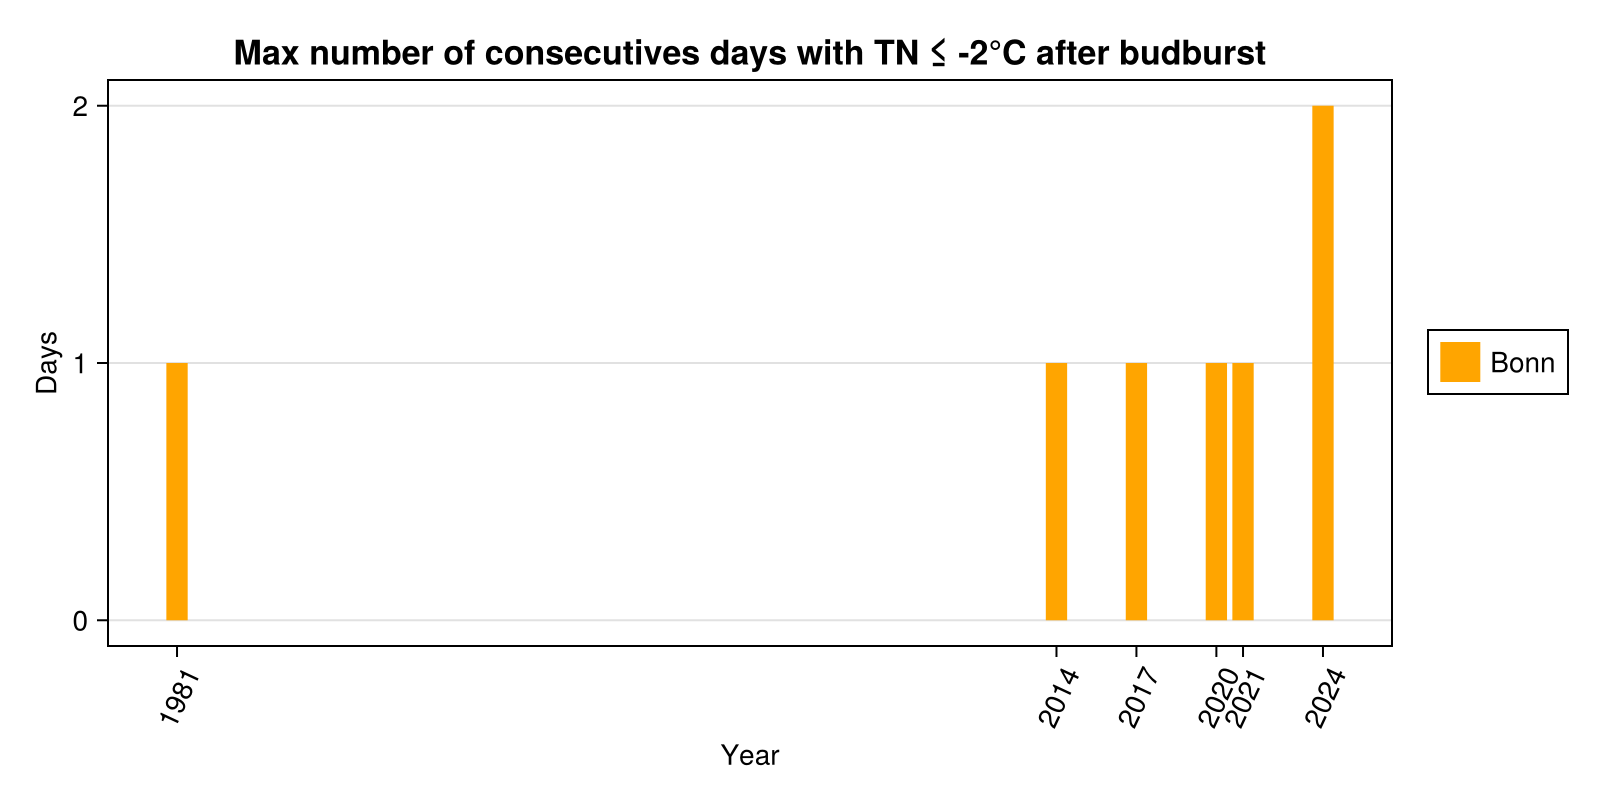

[1, 1, 1, 1, 1, 2]


CairoMakie.Screen{PDF}


In [3]:
DB_Montpellier, BB_Montpellier = Apple_Phenology_Pred(initTG(commonpath * "TG_Montpellier.txt"))
DB_Bonn, BB_Bonn = Apple_Phenology_Pred(initTG(commonpath * "TG_Bonn.txt"))
DB_Nantes, BB_Nantes = Apple_Phenology_Pred(initTG(commonpath * "TG_Nantes.txt"))
DB_Forli, BB_Forli = Apple_Phenology_Pred(initTG(commonpath * "TG_Forli.txt"))

date_vecsBB = [BB_Montpellier, BB_Bonn, BB_Nantes]# BB_Forli]

colors = ["blue", "orange", "green"]#,"maroon"]

fig = Plot_Pheno_Dates_DB_BB([DB_Montpellier, DB_Bonn, DB_Nantes],# DB_Forli],
    date_vecsBB,
    (10, 30),
    DB_label=["EB Montpellier", "EB Bonn", "EB Nantes"],# "DB Forli"],
    BB_label=["BB Montpellier", "BB Bonn", "BB Nantes"],# "DB Forli"],
    DB_colors=colors,
    BB_colors=colors
)
save("Presentation/Apple_pheno.pdf", fig, ; px_per_unit=2.0)
display(fig)

label = ["Montpellier", "Bonn", "Nantes"]

fig = Plot_Freeze_Risk(TN_vecs, dates_vecs_TN, date_vecsBB,
    colors=colors,
    label=label)

display(fig)

include("PhenoPlot.jl")
fig = Plot_Freeze_Risk_Bar(TN_temp_Bonn, BB_Bonn,
    color="orange",
    label="Bonn")

display(fig)
save("Presentation/Freeze_Risk.pdf", fig, ; px_per_unit=2.0)

## Vine phenology model

Endodormancy break date :
$n_{db} = Inf \{ D, \sum_{d = CPO}^D R_c(\theta_d) > Cc \} $  
Budbirst date :
$n_{bb} = Inf \{ D, \sum_{d = n_{db}}^D R_f(\theta_d) > Ghc \} $  
$Cc$, $Ghc$ : Chilling and heating quantity required  
$\theta_d$ : Temperature (TG) at day d  

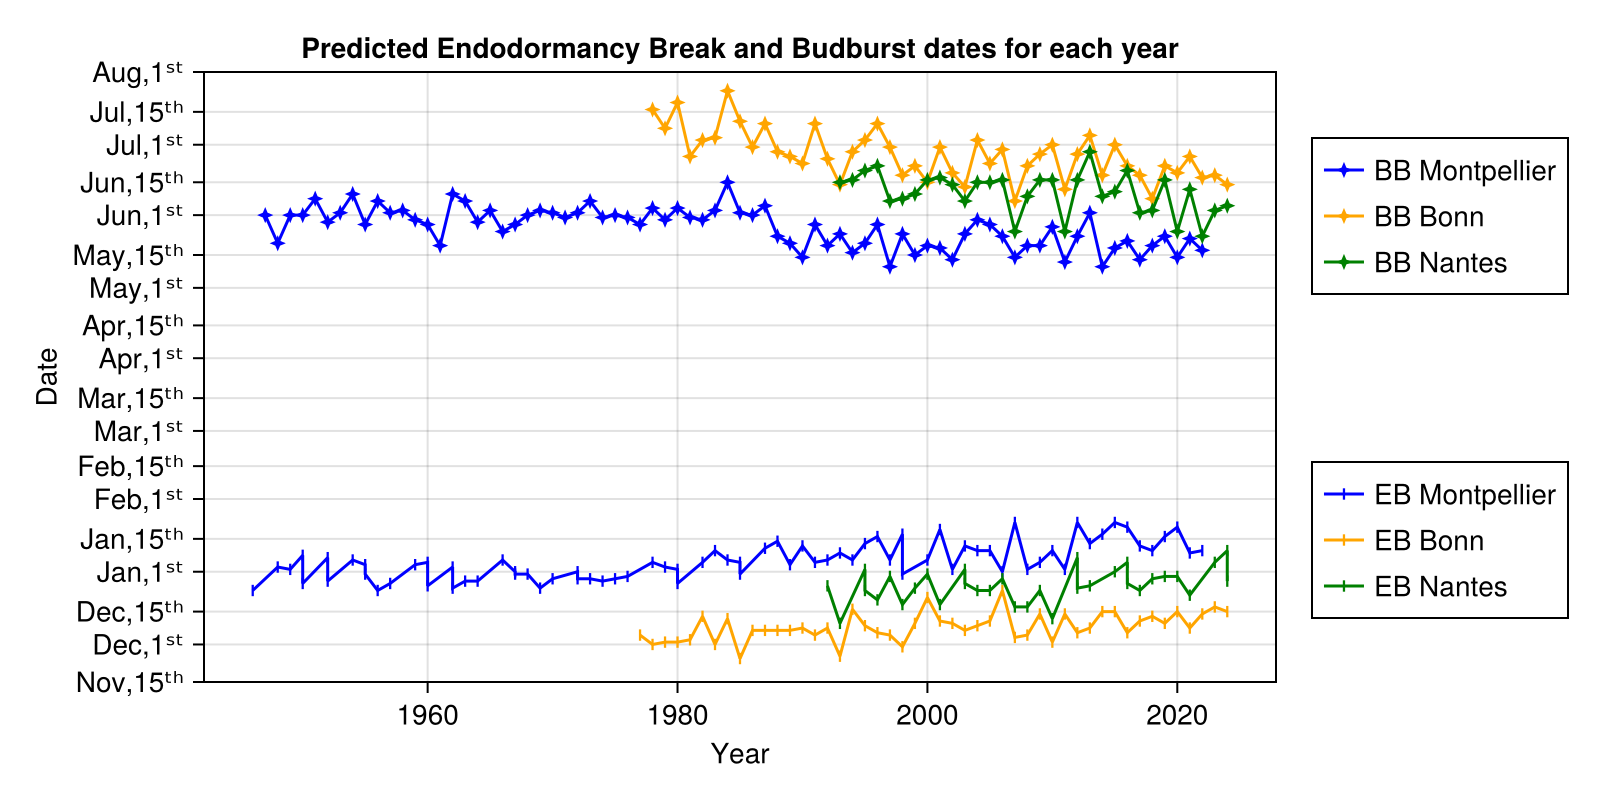

ArgumentError: ArgumentError: argument must not be empty

In [4]:
DB_Montpellier, BB_Montpellier = Vine_Phenology_Pred(commonpath * "TN_Montpellier.txt", commonpath * "TX_Montpellier.txt")
DB_Bonn, BB_Bonn = Vine_Phenology_Pred(commonpath * "TN_Bonn.txt", commonpath * "TX_Bonn.txt")
DB_Nantes, BB_Nantes = Vine_Phenology_Pred(commonpath * "TN_Nantes.txt", commonpath * "TX_Nantes.txt")
# DB_Forli, BB_Forli = Vine_Phenology_Pred(commonpath * "TN_Forli.txt", commonpath * "TX_Forli.txt")

date_vecsBB = [BB_Montpellier, BB_Bonn, BB_Nantes]# BB_Forli]

colors = ["blue", "orange", "green"]#,"maroon"]

fig = Plot_Pheno_Dates_DB_BB([DB_Montpellier, DB_Bonn, DB_Nantes],# DB_Forli],
    date_vecsBB,# BB_Forli],
    (8, 1),
    DB_label=["EB Montpellier", "EB Bonn", "EB Nantes"],# "DB Forli"],
    BB_label=["BB Montpellier", "BB Bonn", "BB Nantes"],# "BB Forli"],
    DB_colors=colors,
    BB_colors=colors
)
save("Presentation/Gvine_pheno.pdf", fig, ; px_per_unit=2.0)
display(fig)

date_vecsBB = [BB_Montpellier, BB_Bonn, BB_Nantes]
label = ["Montpellier", "Bonn", "Nantes"]

fig = Plot_Freeze_Risk(TN_vecs, dates_vecs_TN, date_vecsBB,
    colors=colors,
    label=label,
    threshold=-0.5)

display(fig)

## Generated data on apple model

Phenology of apple with generated data from a model trained on Montpellier records

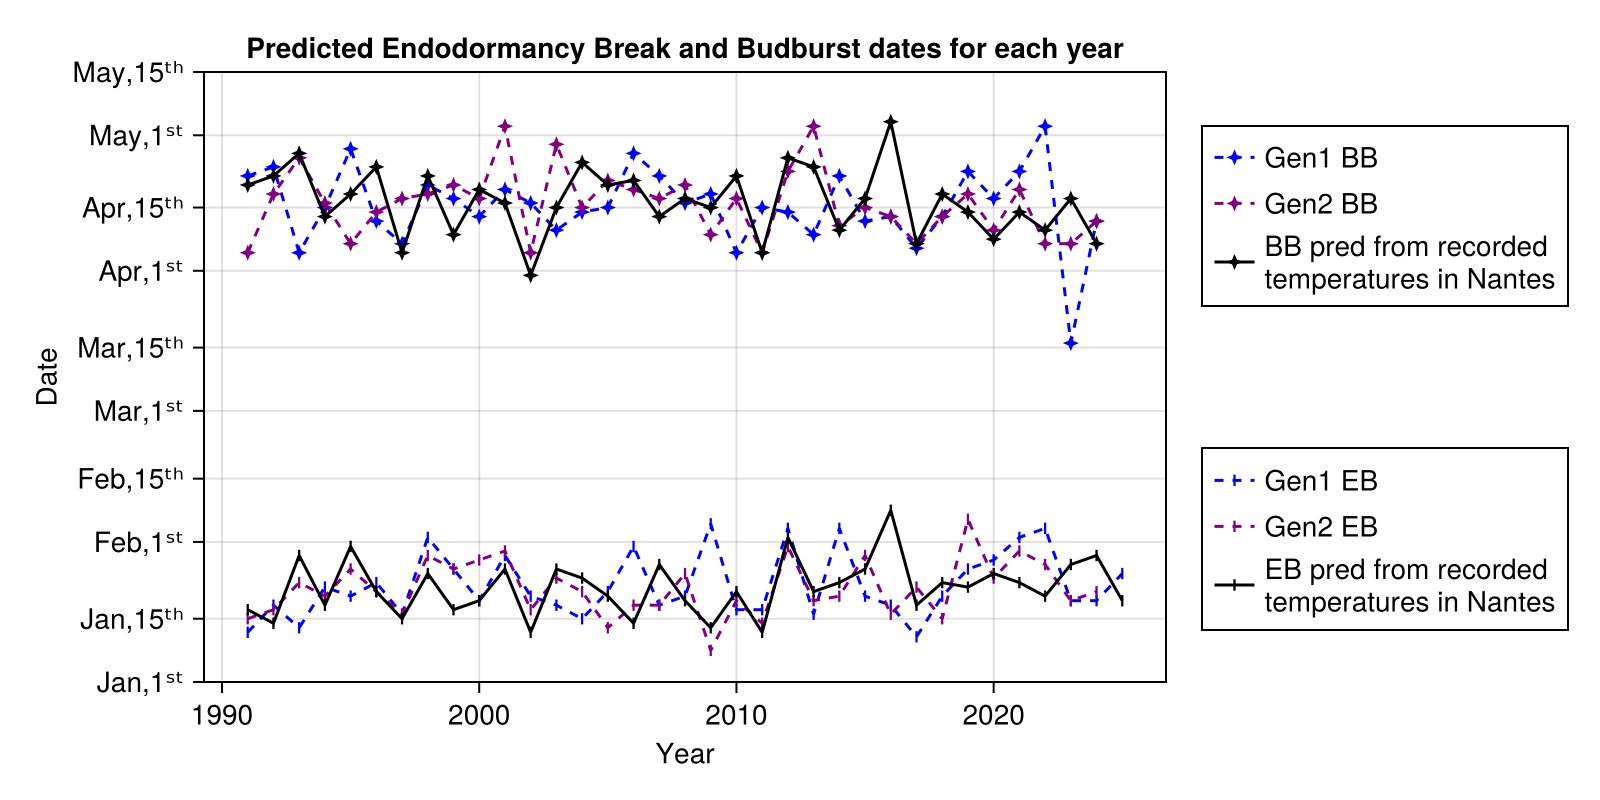

CairoMakie.Screen{IMAGE}


In [5]:
include("../AR/utils/Structure.jl")
include("PhenoPred.jl")
cd(@__DIR__)
series = extract_series(commonpath * "TG_Nantes.txt", type_data="TG")
series = truncate_MV(series, "TG")
x, date_vec = (series[!, 2], series.DATE)

ARmodel = fit_MonthlyAR(x, date_vec)
x_vec = rand(ARmodel, date_vec, 2)

DB_Nantes, BB_Nantes = Apple_Phenology_Pred(x, date_vec)
Tab = [Apple_Phenology_Pred(x_hat, date_vec) for x_hat in x_vec] |> stack

colors = ["blue", "purple", "black"]
fig = Plot_Pheno_Dates_DB_BB([Tab[1, :]; [DB_Nantes]],
    [Tab[2, :]; [BB_Nantes]],
    (10, 30),
    DB_label=[["Gen$(i) EB" for i in 1:2]; "EB pred from recorded\ntemperatures in Nantes"],
    DB_colors=colors,
    BB_label=[["Gen$(i) BB" for i in 1:2]; "BB pred from recorded\ntemperatures in Nantes"],
    BB_colors=colors,
    dashindexes=[1, 2])
save("Presentation/3phenos.pdf", fig, ; px_per_unit=2.0)
display(fig)

Montpellier

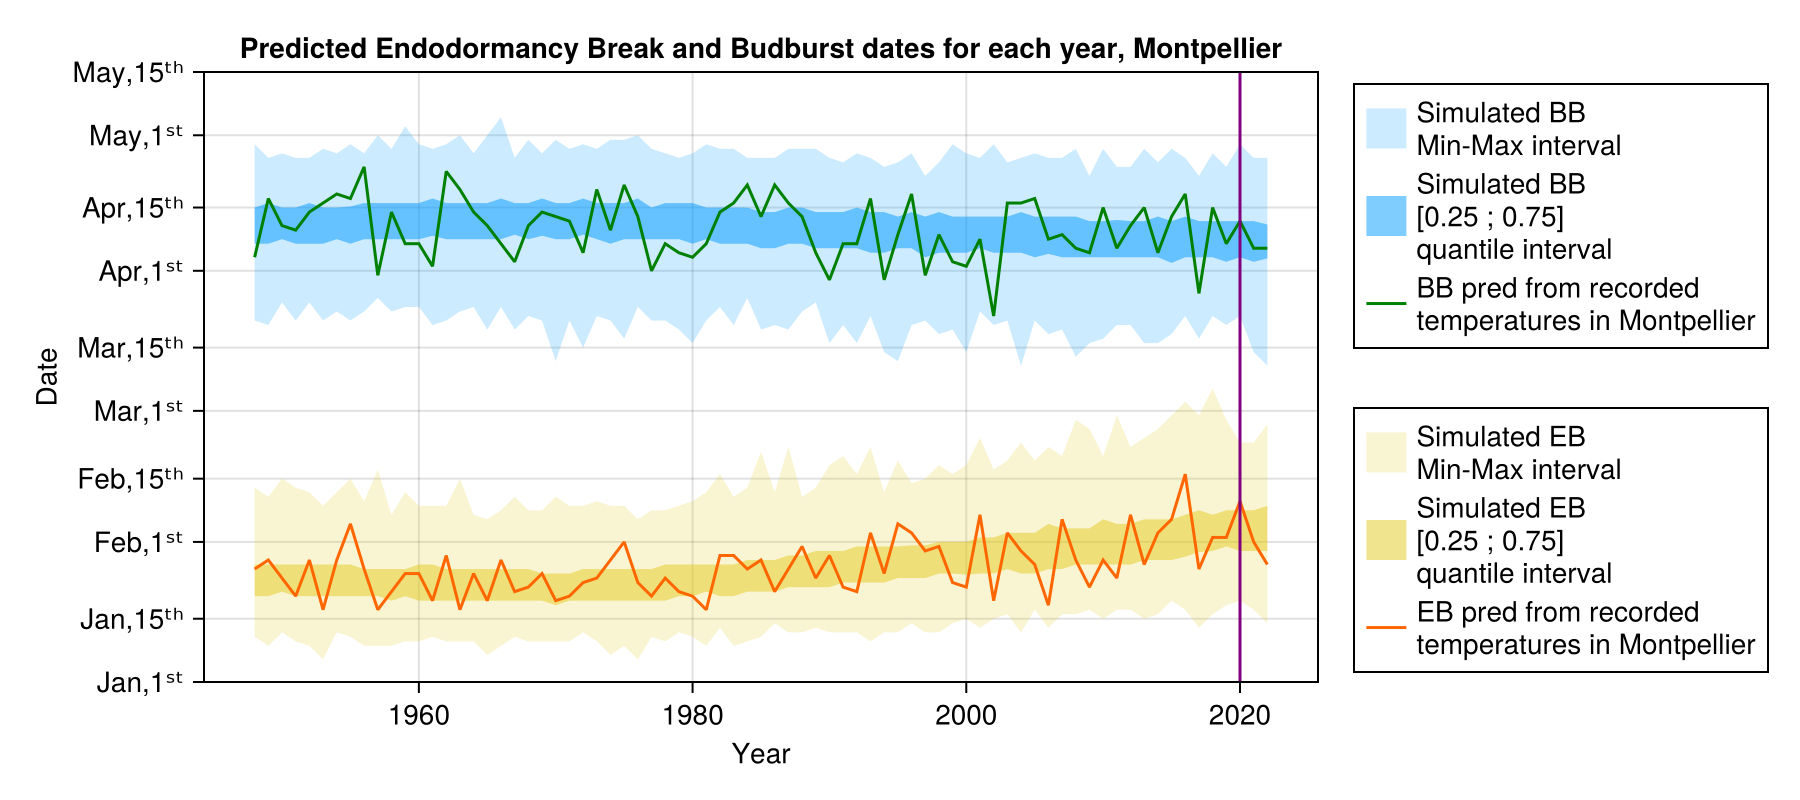

CairoMakie.Screen{PDF}


In [7]:
include("PhenoPlot.jl")
include("../AR/utils/Structure.jl")
cd(@__DIR__)
series = extract_series(commonpath * "TG_Montpellier.txt", type_data="TG")
series = truncate_MV(series, "TG")
x, date_vec = (series[!, 2], series.DATE)
DB_Montpellier, BB_Montpellier = Apple_Phenology_Pred(x, date_vec)

ARmodel = fit_MonthlyAR(x, date_vec, Trendtype="LOESS", trendparam=0.6)
x_vec = rand(ARmodel, date_vec, 500)

Tab = [Apple_Phenology_Pred(x_hat, date_vec) for x_hat in x_vec] |> stack
Set_DB = Tab[1, :]
Set_BB = Tab[2, :]

fig = Plot_Pheno_Dates_DB_BB(DB_Montpellier, BB_Montpellier, (10, 30),
    sample_DB=Set_DB,
    sample_BB=Set_BB,
    station_name="Montpellier",
    YearCut=2020
)
display(fig)
save("Presentation/Montpellier_sim.pdf", fig, ; px_per_unit=2.0)

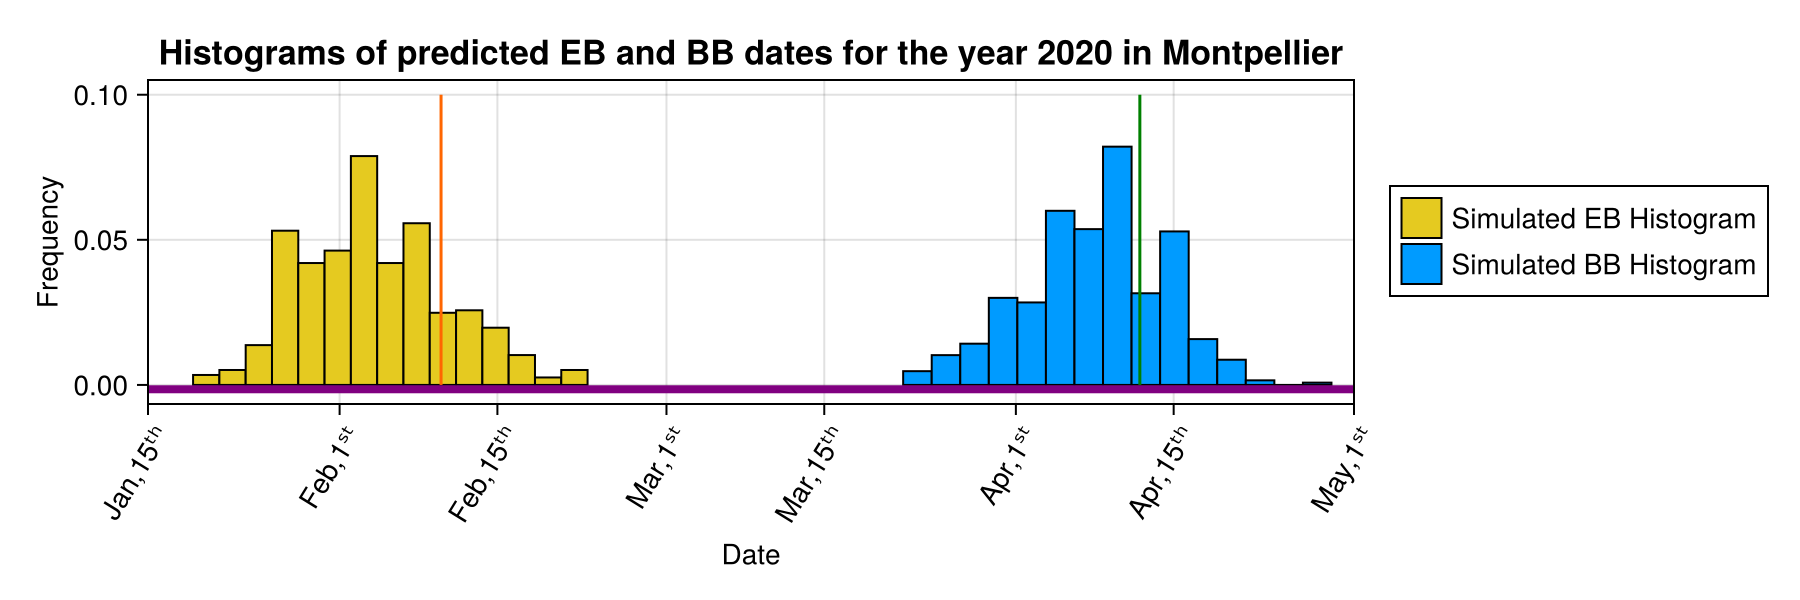

CairoMakie.Screen{PDF}


In [8]:
include("PhenoPlot.jl")
fig = PlotHistogram(DB_Montpellier, BB_Montpellier, (10, 30), 2020,
    sample_DB=Set_DB,
    sample_BB=Set_BB,
    station_name="Montpellier",
    LineHeight=0.1
)
display(fig)
save("Presentation/Montpellier2020.pdf", fig, ; px_per_unit=2.0)

Bonn

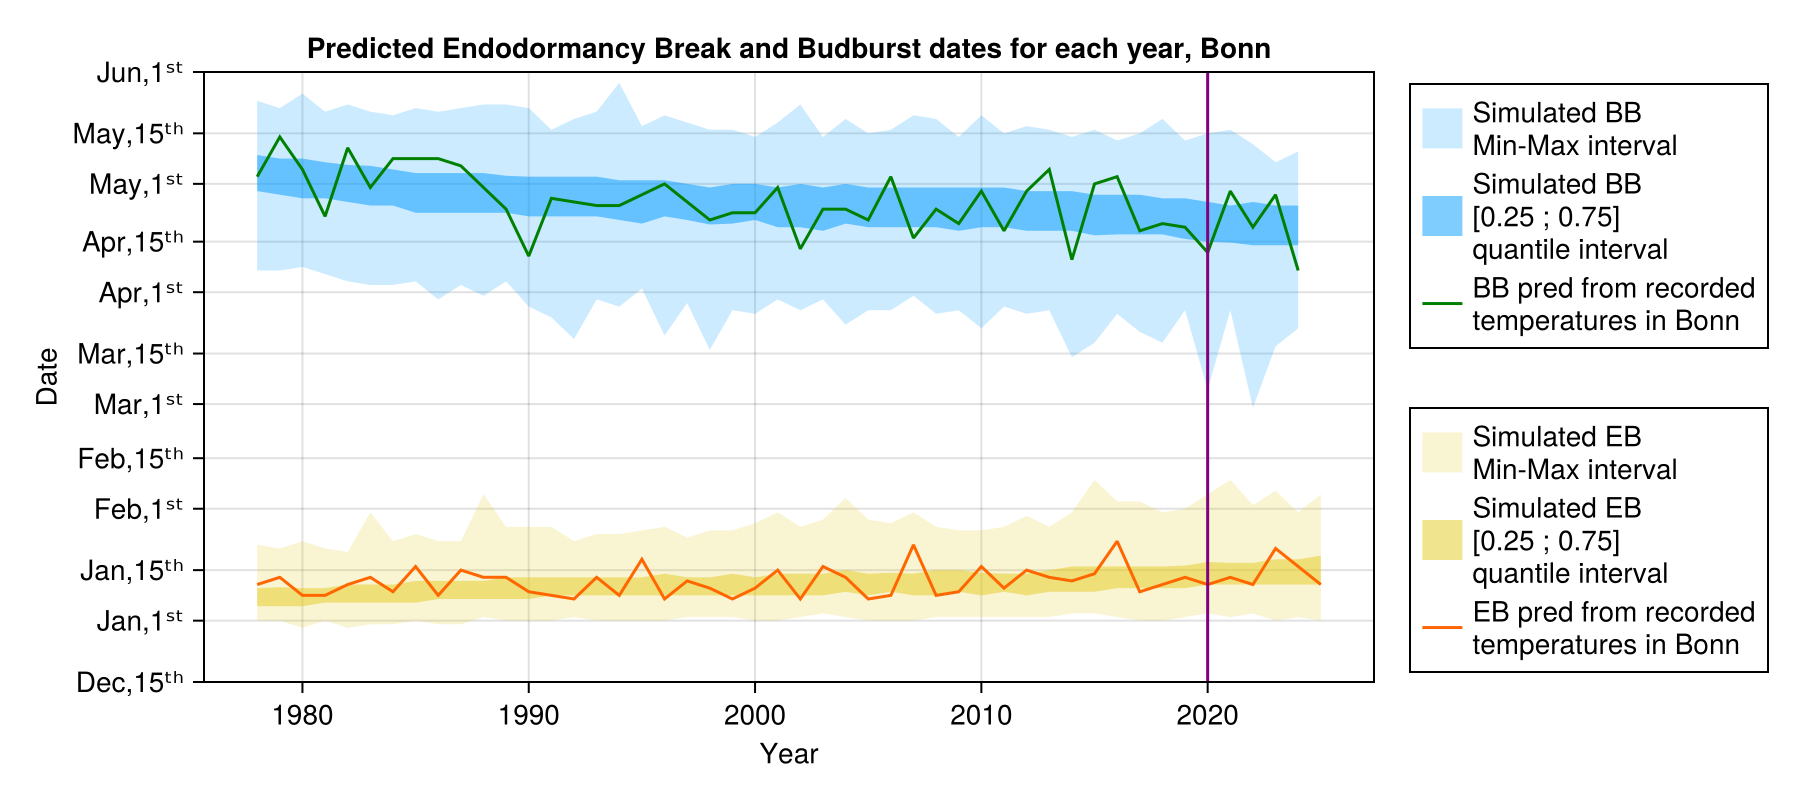

CairoMakie.Screen{PDF}


In [10]:
include("PhenoPlot.jl")
cd(@__DIR__)
series = extract_series(commonpath * "TG_Bonn.txt", type_data="TG")
series = truncate_MV(series, "TG")
x, date_vec = (series[!, 2], series.DATE)

DB_Bonn, BB_Bonn = Apple_Phenology_Pred(x, date_vec)

ARmodel = fit_MonthlyAR(x, date_vec)
x_vec = rand(ARmodel, date_vec, 500)

Tab = [Apple_Phenology_Pred(x_hat, date_vec) for x_hat in x_vec] |> stack
Set_DB = Tab[1, :]
Set_BB = Tab[2, :]

fig = Plot_Pheno_Dates_DB_BB(DB_Bonn, BB_Bonn, (10, 30),
    sample_DB=Set_DB,
    sample_BB=Set_BB,
    station_name="Bonn",
    YearCut=2020
)
display(fig)
save("Presentation/Bonn_sim.pdf", fig, ; px_per_unit=2.0)


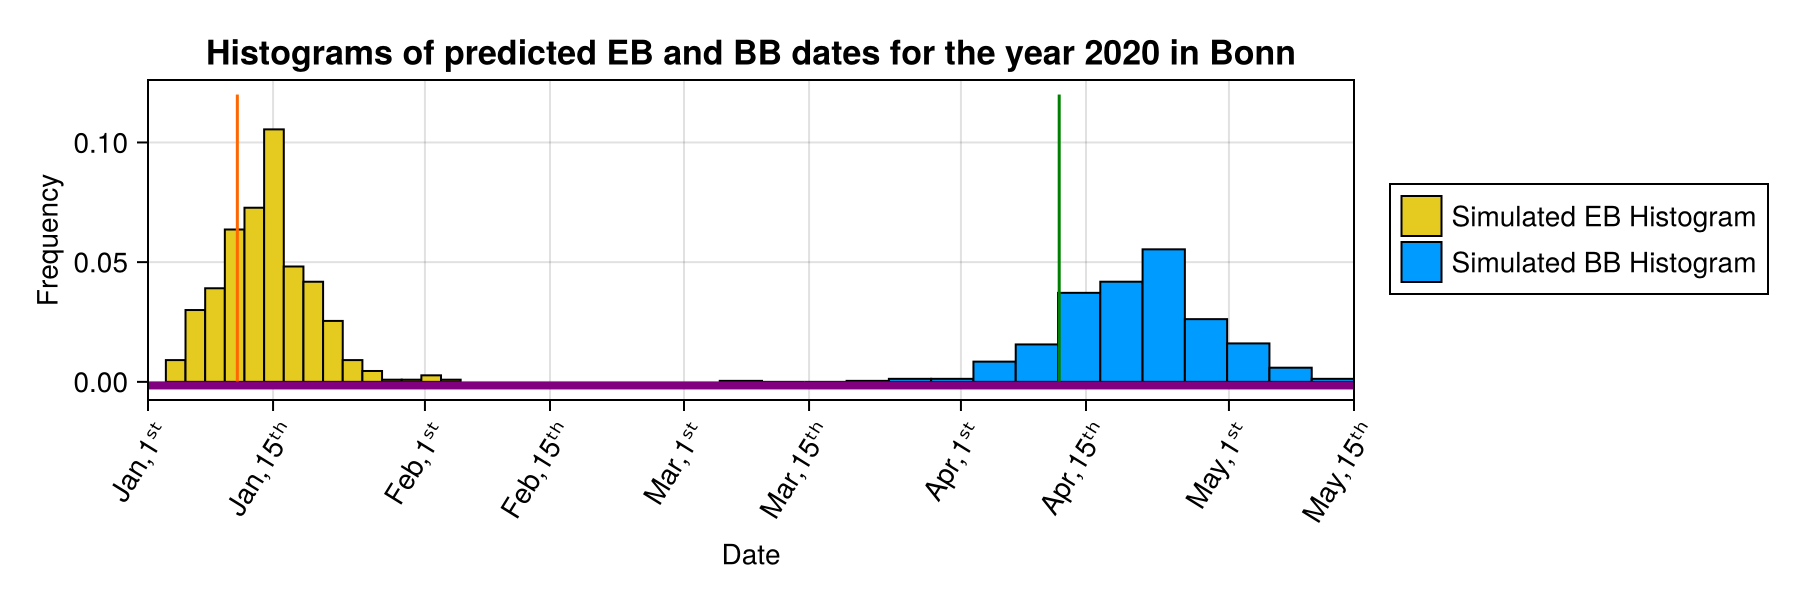

CairoMakie.Screen{PDF}


In [11]:
include("PhenoPlot.jl")
fig = PlotHistogram(DB_Bonn, BB_Bonn, (10, 30), 2020,
    sample_DB=Set_DB,
    sample_BB=Set_BB,
    station_name="Bonn",
    LineHeight=0.12
)
display(fig)
save("Presentation/Bonn2020.pdf", fig, ; px_per_unit=2.0)

Nantes

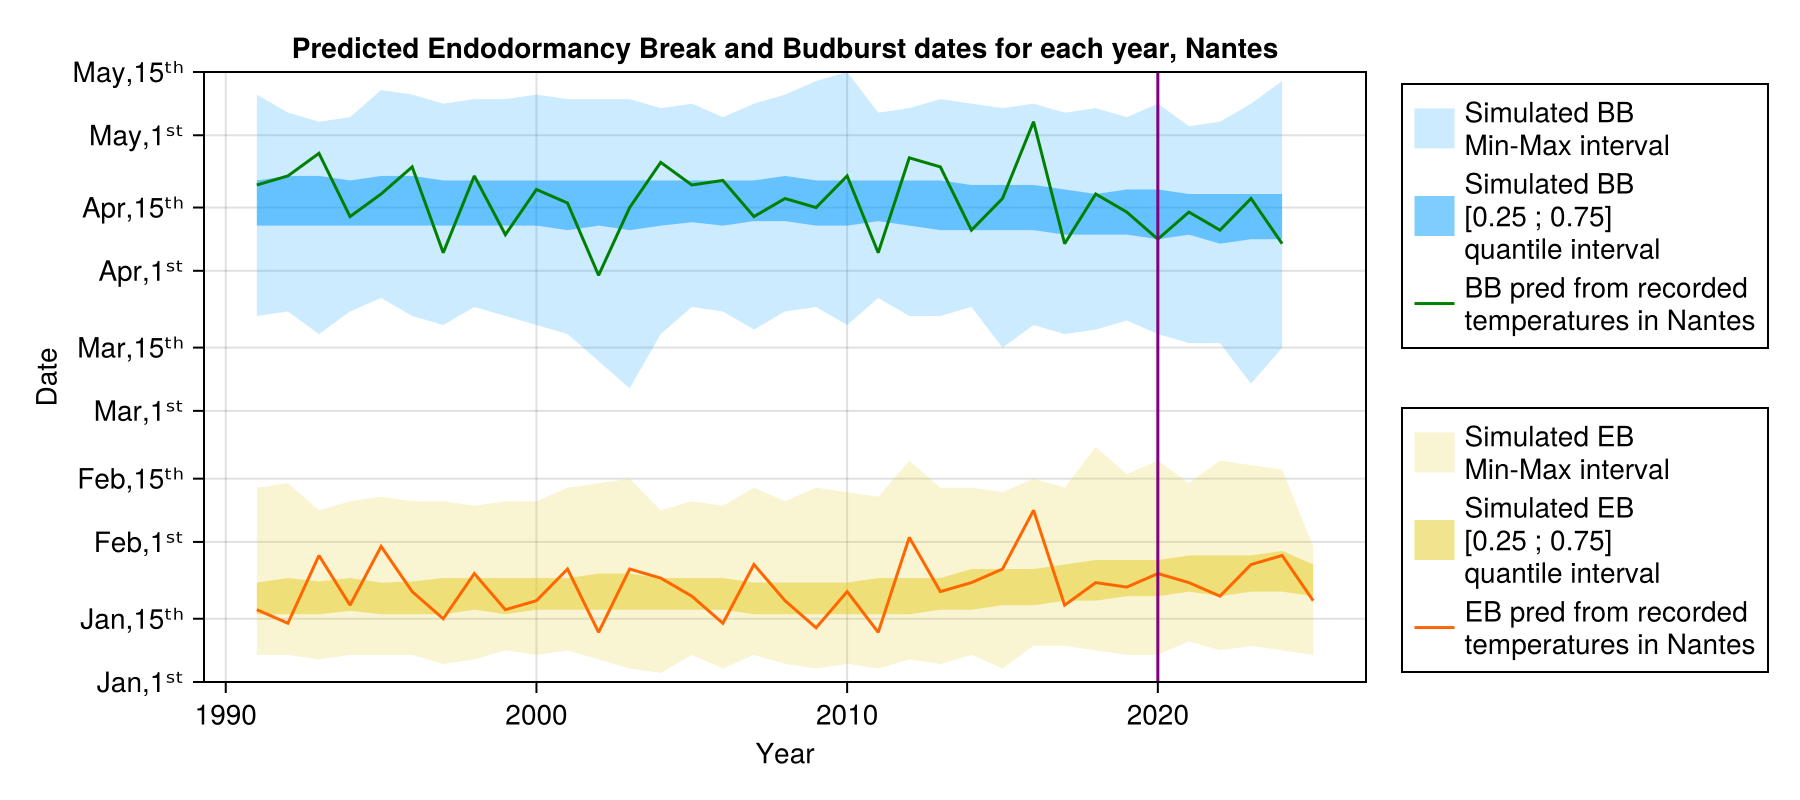

CairoMakie.Screen{PDF}


In [12]:
include("PhenoPlot.jl")
series = extract_series(commonpath * "TG_Nantes.txt", type_data="TG")
series = truncate_MV(series, "TG")
x, date_vec = (series[!, 2], series.DATE)
DB_Nantes, BB_Nantes = Apple_Phenology_Pred(x, date_vec)

ARmodel = fit_MonthlyAR(x, date_vec)
x_vec = rand(ARmodel, date_vec, 1000)

Tab = [Apple_Phenology_Pred(x_hat, date_vec) for x_hat in x_vec] |> stack
Set_DB = Tab[1, :]
Set_BB = Tab[2, :]

fig = Plot_Pheno_Dates_DB_BB(DB_Nantes, BB_Nantes, (10, 30),
    sample_DB=Set_DB,
    sample_BB=Set_BB,
    station_name="Nantes",
    YearCut=2020
)
display(fig)
save("Presentation/Nantes_sim.pdf", fig; px_per_unit=2.0)

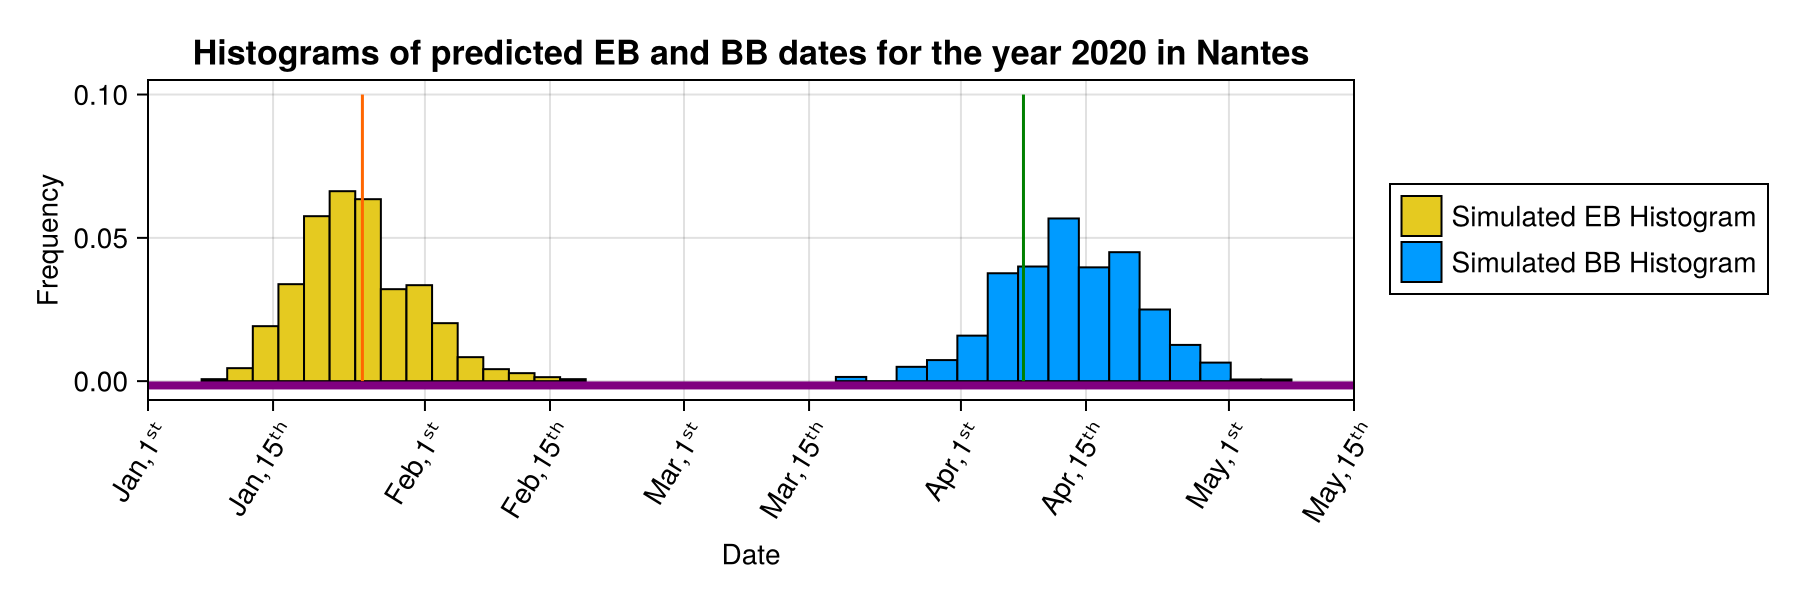

CairoMakie.Screen{PDF}


In [13]:
include("PhenoPlot.jl")
fig = PlotHistogram(DB_Nantes, BB_Nantes, (10, 30), 2020,
    sample_DB=Set_DB,
    sample_BB=Set_BB,
    station_name="Nantes",
    LineHeight=0.1
)
display(fig)
save("Presentation/Nantes2020.pdf", fig, ; px_per_unit=2.0)